# comparing machine learning in scikit-learn


## Evaluate
1. Train model on **entire dataset**
2. Test model on the **same dataset** and evaluate

In [7]:
from sklearn.datasets import load_iris
iris=load_iris()
x=iris.data
y=iris.target

<hr>
## Logistic regression

In [10]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

logreg.fit(x,y)

y_pred = logreg.predict(x)  # evaluation matrix

len(y_pred)

150

## classification accuracy

- proportion of correct prediction
- common evaluation metric for classification problem

In [12]:
from sklearn import metrics

print metrics.accuracy_score(y,y_pred)

# it shows accuracy for responses(target)
# training accuracy = because test on train data

0.96


<hr>
## KNN classification

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)
y_pred=knn.predict(x)

print metrics.accuracy_score(y,y_pred)

0.966666666667


In [19]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x,y)
y_pred=knn.predict(x)

print metrics.accuracy_score(y,y_pred)

#we conclude that  knn=1 is best for iris predictor

1.0


<hr>
<hr>
# OUR GOAL


## problem :: 

complec model = overfit (training accuracy is 100%)


so ::

1. we split dataset into 2 pieces :: training set and test set
2. Train model on **training set**
3. Test model on **test set**

in this method we can predict better for **other test set**

In [22]:
print x.shape
print y.shape

(150L, 4L)
(150L,)


In [54]:
#split data with python split function
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

#train_test_split is random spliter

In [30]:
print len(x_train)
print len(x_test)

print len(x_train)+len(x_test)

90
60
150


In [57]:
#train
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

#test
y_pred = logreg.predict(x_test)

print metrics.precision_score(y_test,y_pred)

0.950631313131


C:\Users\Yasin\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


<hr>
<hr>
# Repeat for KNN 




In [56]:
#knn 5
#train phase
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

#test phase
y_pred = knn.predict(x_test)

print metrics.accuracy_score(y_test,y_pred)

0.983333333333


In [58]:
#knn 5
#train phase
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

#test phase
y_pred = knn.predict(x_test)

print metrics.accuracy_score(y_test,y_pred)

0.966666666667


# find better K

In [60]:
# try k=1 up to specofic
k_range=range(1,26)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
    

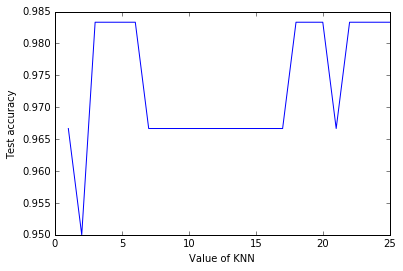

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,scores)
plt.xlabel('Value of KNN')
plt.ylabel('Test accuracy')
plt.show()

<hr><hr>

## Make prediction on out-of-sample data

In [66]:
knn= KNeighborsClassifier(n_neighbors=11)

knn.fit(x,y)

knn.predict([[3,5,4,2]])

array([1])

<hr><hr>

## Downside of train/test split

- spliting provide **high-variance-estimate** of out-pf-sample accurary
- **k-fold** cross-validation is good but
- but train/test split is usefull in flexible and speed

publisher :: **Mohammad khalooei**  12:37 23July 2016 Sat